### Functions plot nick

Functions to plot random intercepts and random_slopes with random intercepts.  
***plot_rand_ind*** : Random intercept  
***plot_rand_slope*** : Random intercept and slope 

In [114]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from numpy import array
from numpy import mean
import matplotlib.pyplot as plt
import seaborn as sns

More information at [stack overflow](https://stackoverflow.com/questions/47502398/python-statsmodels-mixedlm-mixed-linear-model-random-effects)

##### Random intercept
model_random_intercept = sm.MixedLM.from_formula("Y ~ X", data, groups=data["C"])

##### Random intercept & slope
model_random_intercept_and_slope = sm.MixedLM.from_formula("Y ~ X", data, re_formula="X", groups=data["C"])

##### Random slope
model_random_slope = sm.MixedLM.from_formula("Y ~ X", data, re_formula="0 + X", groups=data["C"])

## OLS

In [101]:
data = sm.datasets.get_rdataset("dietox", "geepack").data
md = smf.ols("Weight ~ Time", data)
mdf = md.fit()
print(mdf.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     9584.
Date:                Fri, 03 May 2019   Prob (F-statistic):               0.00
Time:                        15:23:49   Log-Likelihood:                -2916.6
No. Observations:                 861   AIC:                             5837.
Df Residuals:                     859   BIC:                             5847.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.7053      0.521     30.161      0.0

## Random intercept

In [102]:
md = smf.mixedlm("Weight ~ Time", data, groups=data["Pig"])
mdf = md.fit()
print(mdf.summary())

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Weight    
No. Observations: 861     Method:             REML      
No. Groups:       72      Scale:              11.3669   
Min. group size:  11      Likelihood:         -2404.7753
Max. group size:  12      Converged:          Yes       
Mean group size:  12.0                                  
--------------------------------------------------------
             Coef.  Std.Err.    z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept    15.724    0.788  19.952 0.000 14.179 17.268
Time          6.943    0.033 207.939 0.000  6.877  7.008
Group Var    40.394    2.149                            



Access to the fixed parameters  
mdf.params.Time

Acces to the random parameters  
mdf.random_effects.index.Group

In [103]:
##
keys = list(mdf.random_effects.keys())
intercept_add_each= array([ round(mdf.random_effects[keys[i]].Group, 2) for i in range(0, len(keys))])
slope = mdf.params.Time

# intercept_add_each is what you add to each intercept, so the mean must be 0
print(mean(intercept_add_each))

# Real intercepts (specific of the subject + general)
intercept_each_subj =  intercept_add_each + mdf.params.Intercept

-0.0004166666666667318


### Plot to see each Pig

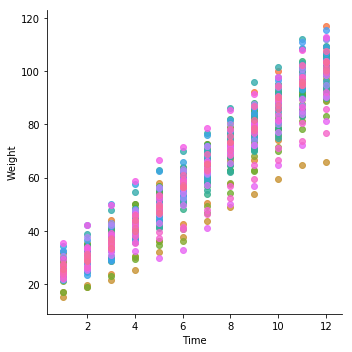

In [104]:
sns.lmplot('Time', 'Weight', data,  hue='Pig', fit_reg=False, legend=False)

### Random intercept for each Pig

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


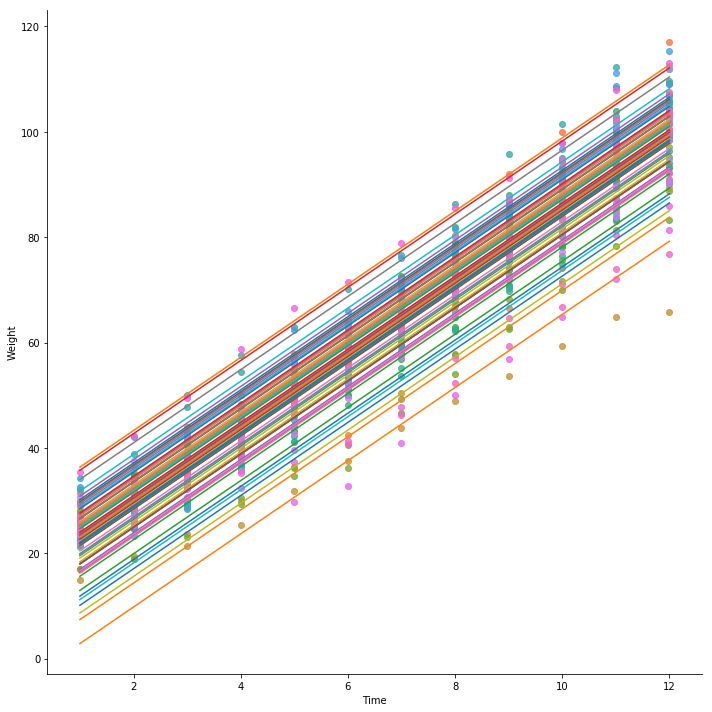

In [105]:
#Add the random intercept for each
sns.lmplot('Time', 'Weight', data,  hue='Pig', fit_reg=False, legend=False, size=10)


for i in range(0, len(intercept_each_subj)):
    intercept_s=intercept_each_subj[i]
    start_l = data['Time'].min()
    end_l = data['Time'].max()
    plt.plot([start_l, end_l], [slope*start_l + intercept_s, slope*end_l + intercept_s])



### Function to plot random intercept
Same plot as before but with a function


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


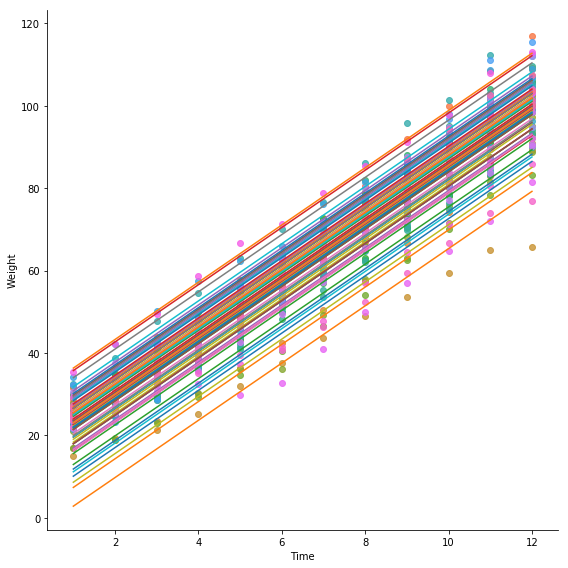

In [106]:
def plot_rand_int(data, x, y, hue, random_intercepts, slope):
    
    sns.lmplot(x, y, data,  hue=hue, fit_reg=False, legend=False, size=8)
    
    for i, ind in enumerate(list(data[hue].unique())):
        intercept_s=random_intercepts[i]
        #slope_s=random_intercepts[i]
        start_l = data.loc[data[hue]==ind, x].min()
        end_l = data.loc[data[hue]==ind, x].max()
        plt.plot([start_l, end_l], [slope*start_l + intercept_s, slope*end_l + intercept_s])



#Example
plot_rand_int(data=data, x='Time', y='Weight', hue='Pig', random_intercepts = intercept_each_subj, slope=slope)

## Random intercept & slope

In [107]:
#Add the random slope
md = smf.mixedlm("Weight ~ Time", data, groups=data["Pig"], re_formula="~Time")
mdf = md.fit()
print(mdf.summary())

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


           Mixed Linear Model Regression Results
Model:             MixedLM  Dependent Variable:  Weight    
No. Observations:  861      Method:              REML      
No. Groups:        72       Scale:               5.7891    
Min. group size:   11       Likelihood:          -2220.3890
Max. group size:   12       Converged:           No        
Mean group size:   12.0                                    
-----------------------------------------------------------
                 Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------
Intercept        15.739    0.672 23.438 0.000 14.423 17.055
Time              6.939    0.085 81.326 0.000  6.772  7.106
Group Var        30.266    4.271                           
Group x Time Cov  0.746    0.304                           
Time Var          0.483    0.046                           



C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2026: ConvergenceWarning: Gradient optimization failed.
  warnings.warn(msg, ConvergenceWarning)


In [108]:
keys = list(mdf.random_effects.keys())

intercept_add_each= array([ round(mdf.random_effects[keys[i]].Group, 2) for i in range(0, len(keys))])
slope_add_each= array([ round(mdf.random_effects[keys[i]].Time, 2) for i in range(0, len(keys))])

# intercept_add_each is what you add to each intercept, so the mean must be 0
print(mean(intercept_add_each))
print(mean(slope_add_each))

intercept_each_subj =  intercept_add_each + mdf.params.Intercept
slope_each_subj =  slope_add_each + mdf.params.Time

#intercept_each_subj
#slope_each_subj

-0.0005555555555554944
-0.00013888888888888593


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


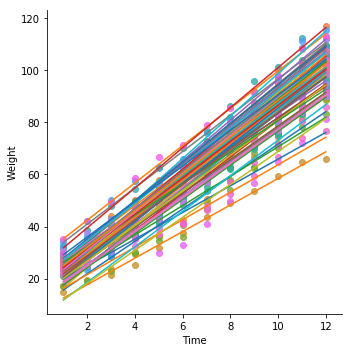

In [109]:
sns.lmplot('Time', 'Weight', data,  hue='Pig', fit_reg=False, legend=False, size=5)


for i in range(0, len(intercept_each_subj)):
    intercept_s=intercept_each_subj[i]
    slope_s=slope_each_subj[i]
    start_l = data['Time'].min()
    end_l = data['Time'].max()
    plt.plot([start_l, end_l], [slope_s*start_l + intercept_s, slope_s*end_l + intercept_s])


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


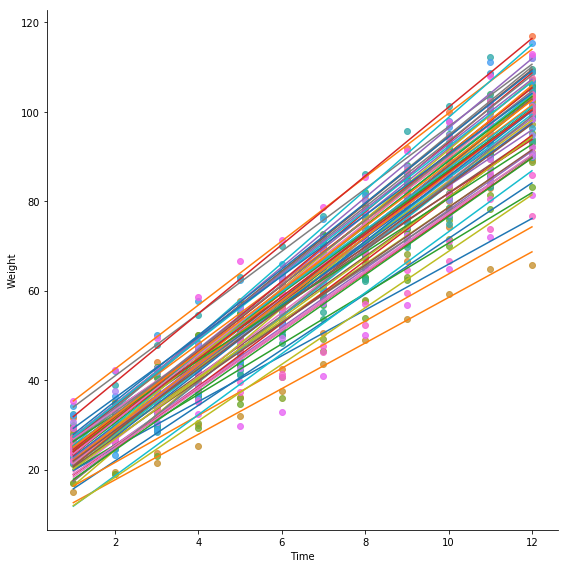

In [110]:
#### As a function

def plot_rand_slope(data, x, y, hue, random_intercepts, random_slopes):
    
    sns.lmplot(x, y, data,  hue=hue, fit_reg=False, legend=False, size=8)
    
    for i, ind in enumerate(list(data[hue].unique())):
        intercept_s=random_intercepts[i]
        slope_s=random_slopes[i]
        start_l = data.loc[data[hue]==ind, x].min()
        end_l = data.loc[data[hue]==ind, x].max()
        plt.plot([start_l, end_l], [slope_s*start_l + intercept_s, slope_s*end_l + intercept_s])


        
        
#Example
plot_rand_slope(data=data, x='Time', y='Weight', hue='Pig', random_intercepts = intercept_each_subj, random_slopes=slope_each_subj)

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


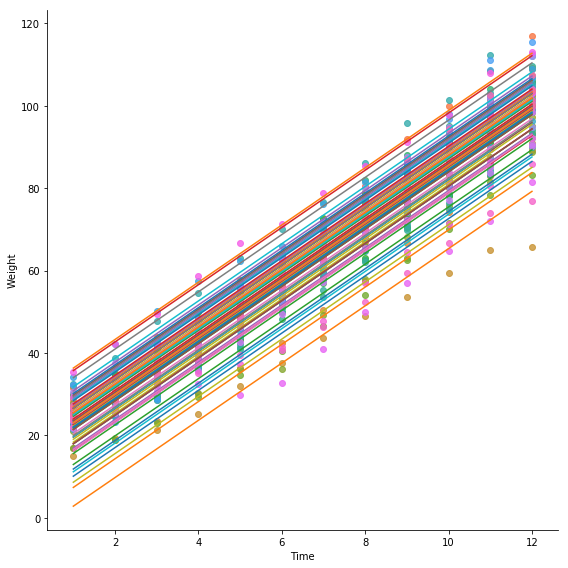

In [111]:
## Example random intercept

md = smf.mixedlm("Weight ~ Time", data, groups=data["Pig"], re_formula="~1")
mdf = md.fit()

keys = list(mdf.random_effects.keys())
intercept_add_each= array([ round(mdf.random_effects[keys[i]].Group, 2) for i in range(0, len(keys))])
slope = mdf.params.Time

I_s =  intercept_add_each + mdf.params.Intercept

plot_rand_int(data,'Time','Weight','Pig', I_s, slope)





C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likel

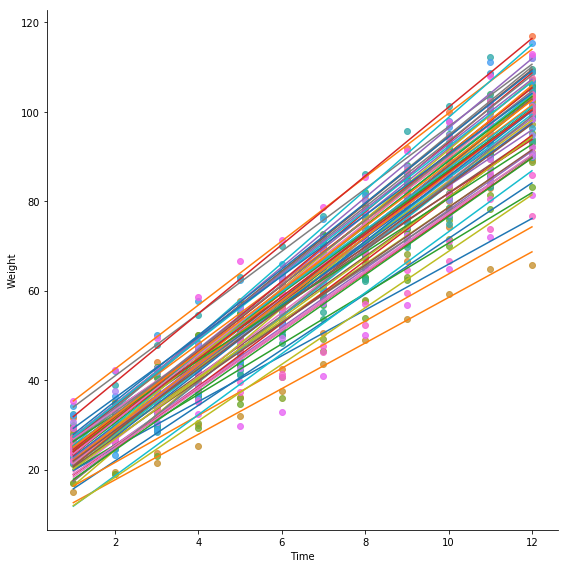

In [112]:
## Example random slope
md = smf.mixedlm("Weight ~ Time", data, groups=data["Pig"], re_formula="~Time")
mdf = md.fit()

keys = list(mdf.random_effects.keys())

intercept_add_each= array([ round(mdf.random_effects[keys[i]].Group, 2) for i in range(0, len(keys))])
slope_add_each= array([ round(mdf.random_effects[keys[i]].Time, 2) for i in range(0, len(keys))])

I_s =  intercept_add_each + mdf.params.Intercept
S_s =  slope_add_each + mdf.params.Time

plot_rand_slope(data,'Time','Weight','Pig', I_s, S_s)

## Random slope (fixed intercept)

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likel

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Weight    
No. Observations: 861     Method:             REML      
No. Groups:       72      Scale:              9.8494    
Min. group size:  11      Likelihood:         -2438.9212
Max. group size:  12      Converged:          No        
Mean group size:  12.0                                  
--------------------------------------------------------
              Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept     15.742    0.228 69.017 0.000 15.294 16.189
Time           6.938    0.371 18.693 0.000  6.211  7.666
Time Var       9.849                                    



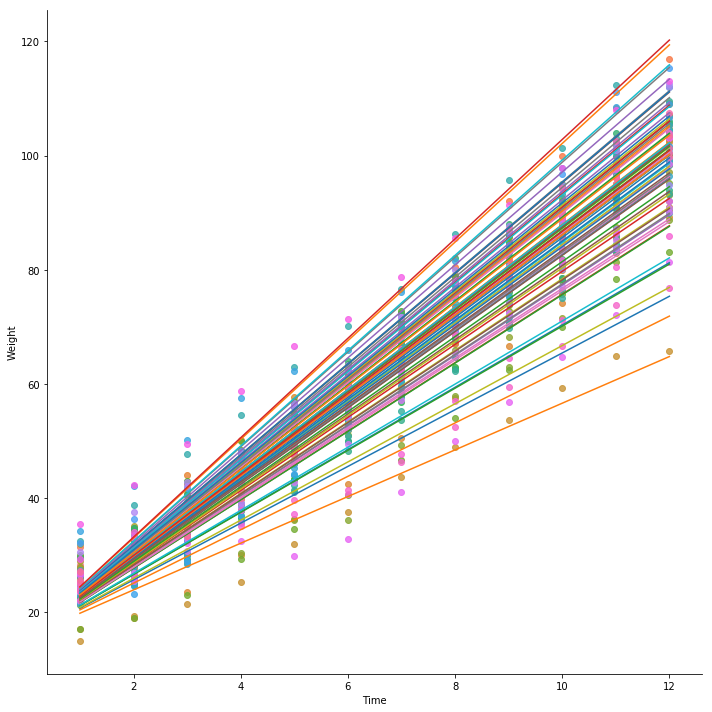

In [113]:
md = smf.mixedlm("Weight ~ Time", data, groups=data["Pig"], re_formula="~0 + Time")
mdf = md.fit()
print(mdf.summary())

keys = list(mdf.random_effects.keys())

intercept = mdf.params.Intercept
slope_add_each= array([ round(mdf.random_effects[keys[i]].Time, 2) for i in range(0, len(keys))])
slope_each_subj =  slope_add_each + mdf.params.Time


sns.lmplot('Time', 'Weight', data,  hue='Pig', fit_reg=False, legend=False, size=10)

for i in range(0, len(slope_add_each)):
    intercept_s=intercept
    slope_s=slope_each_subj[i]
    start_l = data['Time'].min()
    end_l = data['Time'].max()
    plt.plot([start_l, end_l], [slope_s*start_l + intercept_s, slope_s*end_l + intercept_s])

